<a href="https://colab.research.google.com/github/malakelbasha78/AI-Skills-Projects/blob/main/models/ResNet50/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image Preprocessing Notebook (NO MERGE – NO DATA LEAKAGE)

This notebook performs **safe preprocessing** for an image classification task:
- Keeps **train / val / test** completely separate
- No merge, no reshuffle, no resplit
- Converts images to RGB
- Removes corrupted images
- Removes duplicate images **inside each split only**
- No resize, no normalization, no augmentation (these are done in training)

This design guarantees **zero data leakage**.



## 1️⃣ Imports
We import only what is required for preprocessing.


In [ ]:
!pip install kagglehub

In [ ]:

import os
import hashlib
from PIL import Image
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras import layers,models
import kagglehub


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyasharma20/plantv")

print("Path to dataset files:", path)

100%|██████████| 825M/825M [00:20<00:00, 42.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/divyasharma20/plantv/versions/1



## 2️⃣ Configuration
Define dataset structure and splits.


In [ ]:
# DATASET_DIR جاي من kagglehub
# path = kagglehub.dataset_download(...)

DATASET_DIR = os.path.join(path, "PlantVillage")
SPLITS = ["train", "val"]


In [ ]:
import os
os.listdir(path)


['PlantVillage']

In [ ]:
os.listdir(os.path.join(path, 'PlantVillage'))


['train', 'val']


## 3️⃣ Dataset Structure Check
Verify that train / val / test folders exist.



## 4️⃣ Count Images Before Preprocessing
We count images per class to compare before vs after.


In [ ]:

def count_images():
    counts = defaultdict(dict)
    for split in SPLITS:
        split_path = os.path.join(DATASET_DIR, split)
        if not os.path.exists(split_path):
            continue
        for cls in os.listdir(split_path):
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                counts[split][cls] = len(os.listdir(cls_path))
    return counts

before_counts = count_images()
print("Image counts BEFORE preprocessing:")
before_counts


Image counts BEFORE preprocessing:


defaultdict(dict,
            {'train': {'Tomato___healthy': 1273,
              'Grape___Esca_(Black_Measles)': 1107,
              'Corn_(maize)___Common_rust_': 953,
              'Tomato___Leaf_Mold': 761,
              'Grape___healthy': 339,
              'Peach___healthy': 288,
              'Apple___Cedar_apple_rust': 220,
              'Grape___Black_rot': 944,
              'Tomato___Spider_mites Two-spotted_spider_mite': 1341,
              'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 410,
              'Tomato___Target_Spot': 1123,
              'Tomato___Septoria_leaf_spot': 1417,
              'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 4286,
              'Pepper,_bell___Bacterial_spot': 797,
              'Tomato___Early_blight': 800,
              'Cherry_(including_sour)___healthy': 684,
              'Peach___Bacterial_spot': 1838,
              'Potato___Late_blight': 800,
              'Potato___healthy': 121,
              'Blueberry___healthy': 1202,
     


## 5️⃣ Remove Corrupted Images + Convert to RGB
This ensures all images are readable and consistent.


In [ ]:
def clean_images(split_path):
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path):
            continue

        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img.save(img_path)
            except Exception:
                if os.path.exists(img_path):
                    os.remove(img_path)




## 6️⃣ Remove Duplicate Images (Inside Each Split)
Duplicates are removed **per split only** to avoid leakage.


In [ ]:

def remove_duplicates(split_path):
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path):
            continue

        hashes = set()

        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                img_hash = hashlib.md5(img.tobytes()).hexdigest()

                if img_hash in hashes:
                    os.remove(img_path)
                else:
                    hashes.add(img_hash)

            except Exception:
                if os.path.exists(img_path):
                    os.remove(img_path)




## 7️⃣ Run Preprocessing
Apply cleaning and duplicate removal independently for each split.


In [ ]:
for split in SPLITS:
    split_path = os.path.join(DATASET_DIR, split)

    if os.path.exists(split_path):
        print(f"Processing {split}...")
        clean_images(split_path)
        remove_duplicates(split_path)
    else:
        print(f"Skipping {split}, folder not found")



## 8️⃣ Count Images After Preprocessing
Ensure no class leakage or unexpected changes occurred.


In [ ]:

after_counts = count_images()
print("Image counts AFTER preprocessing:")
after_counts


Image counts AFTER preprocessing:


defaultdict(dict,
            {'train': {'Tomato___healthy': 1269,
              'Grape___Esca_(Black_Measles)': 1107,
              'Corn_(maize)___Common_rust_': 953,
              'Tomato___Leaf_Mold': 761,
              'Grape___healthy': 339,
              'Peach___healthy': 288,
              'Apple___Cedar_apple_rust': 220,
              'Grape___Black_rot': 944,
              'Tomato___Spider_mites Two-spotted_spider_mite': 1341,
              'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 410,
              'Tomato___Target_Spot': 1123,
              'Tomato___Septoria_leaf_spot': 1417,
              'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 4286,
              'Pepper,_bell___Bacterial_spot': 797,
              'Tomato___Early_blight': 800,
              'Cherry_(including_sour)___healthy': 684,
              'Peach___Bacterial_spot': 1838,
              'Potato___Late_blight': 800,
              'Potato___healthy': 121,
              'Blueberry___healthy': 1202,
     

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
from tensorflow.keras import layers,models


SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)


In [ ]:
TRAIN_DIR = "dataset/train"
VAL_DIR   = "dataset/val"
TEST_DIR  = "dataset/test"

IMG_SIZE = (224, 224)     # ResNet50 القياسي
BATCH_SIZE = 16
EPOCHS_STAGE1 = 8
EPOCHS_STAGE2 = 12


In [ ]:
import os

TRAIN_DIR = os.path.join(path, "PlantVillage/train")
VAL_DIR   = os.path.join(path, "PlantVillage/val")


In [ ]:
import os

TRAIN_DIR = os.path.join(path, "PlantVillage/train")
VAL_DIR   = os.path.join(path, "PlantVillage/val")

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

NUM_CLASSES = len(train_ds.class_names)



Found 44003 files belonging to 39 classes.
Found 11004 files belonging to 39 classes.


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history1, history2=None):
    acc = history1.history["accuracy"]
    val_acc = history1.history["val_accuracy"]
    loss = history1.history["loss"]
    val_loss = history1.history["val_loss"]

    if history2 is not None:
        acc += history2.history["accuracy"]
        val_acc += history2.history["val_accuracy"]
        loss += history2.history["loss"]
        val_loss += history2.history["val_loss"]

    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Train Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Train Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")

    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history1, history2=None):
    acc = history1.history["accuracy"]
    val_acc = history1.history["val_accuracy"]
    loss = history1.history["loss"]
    val_loss = history1.history["val_loss"]

    if history2 is not None:
        acc += history2.history["accuracy"]
        val_acc += history2.history["val_accuracy"]
        loss += history2.history["loss"]
        val_loss += history2.history["val_loss"]

    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Train Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Train Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")

    plt.show()


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)



In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

normalization = layers.Rescaling(1./255)


In [ ]:
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  #stage one



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = normalization(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs)


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_resnet50.h5",
    monitor="val_accuracy",
    save_best_only=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-6
)

callbacks = [early_stop, checkpoint, reduce_lr]


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
history_stage1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4230 - loss: 2.1247

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 262s 91ms/step - accuracy: 0.4230 - loss: 2.1246 - val_accuracy: 0.5571 - val_loss: 1.5899 - learning_rate: 0.0010
Epoch 2/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5817 - loss: 1.4194

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 253s 89ms/step - accuracy: 0.5817 - loss: 1.4193 - val_accuracy: 0.5823 - val_loss: 1.5493 - learning_rate: 0.0010
Epoch 3/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6150 - loss: 1.2862

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 246s 89ms/step - accuracy: 0.6150 - loss: 1.2862 - val_accuracy: 0.6177 - val_loss: 1.3914 - learning_rate: 0.0010
Epoch 4/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6340 - loss: 1.2237

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 245s 89ms/step - accuracy: 0.6340 - loss: 1.2237 - val_accuracy: 0.6320 - val_loss: 1.3541 - learning_rate: 0.0010
Epoch 5/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6449 - loss: 1.1751

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 245s 89ms/step - accuracy: 0.6449 - loss: 1.1751 - val_accuracy: 0.6485 - val_loss: 1.3003 - learning_rate: 0.0010
Epoch 6/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6539 - loss: 1.1439

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 263s 89ms/step - accuracy: 0.6539 - loss: 1.1439 - val_accuracy: 0.6557 - val_loss: 1.2608 - learning_rate: 0.0010
Epoch 7/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6609 - loss: 1.1152

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 246s 89ms/step - accuracy: 0.6609 - loss: 1.1151 - val_accuracy: 0.6738 - val_loss: 1.2099 - learning_rate: 0.0010
Epoch 8/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 247s 90ms/step - accuracy: 0.6694 - loss: 1.0913 - val_accuracy: 0.6674 - val_loss: 1.2608 - learning_rate: 0.0010
Epoch 9/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 246s 89ms/step - accuracy: 0.6738 - loss: 1.0747 - val_accuracy: 0.6652 - val_loss: 1.3345 - learning_rate: 0.0010
Epoch 10/10
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6785 - loss: 1.0570

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 255s 93ms/step - accuracy: 0.6785 - loss: 1.0570 - val_accuracy: 0.6801 - val_loss: 1.2123 - learning_rate: 0.0010


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-25]:
    layer.trainable = False


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history_stage2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 335s 117ms/step - accuracy: 0.4230 - loss: 8.4021 - val_accuracy: 0.5663 - val_loss: 3.1752 - learning_rate: 1.0000e-05
Epoch 2/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.5699 - loss: 2.3315 - val_accuracy: 0.6156 - val_loss: 2.0540 - learning_rate: 1.0000e-05
Epoch 3/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 320s 116ms/step - accuracy: 0.6054 - loss: 1.5927 - val_accuracy: 0.5463 - val_loss: 2.5115 - learning_rate: 1.0000e-05
Epoch 4/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.6391 - loss: 1.3043 - val_accuracy: 0.5415 - val_loss: 2.1285 - learning_rate: 1.0000e-05
Epoch 5/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 322s 117ms/step - accuracy: 0.6654 - loss: 1.1704 - val_accuracy: 0.6410 - val_loss: 1.7048 - learning_rate: 1.0000e-05
Epoch 6/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.6817 - loss: 1.0863 - val_accuracy: 0.6532 - val_loss: 1.5653 - learning_rate: 1.0000e-05
Epoch 7/15
2751/2751 ━━━━━━━

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 322s 117ms/step - accuracy: 0.7062 - loss: 0.9775 - val_accuracy: 0.6904 - val_loss: 1.2624 - learning_rate: 1.0000e-05
Epoch 9/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.7213 - loss: 0.9180 - val_accuracy: 0.6711 - val_loss: 1.5193 - learning_rate: 1.0000e-05
Epoch 10/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.7279 - loss: 0.8982 - val_accuracy: 0.6715 - val_loss: 1.5422 - learning_rate: 1.0000e-05
Epoch 11/15
2750/2751 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7305 - loss: 0.8902

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.7305 - loss: 0.8902 - val_accuracy: 0.7642 - val_loss: 0.8034 - learning_rate: 1.0000e-05
Epoch 12/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 320s 116ms/step - accuracy: 0.7426 - loss: 0.8484 - val_accuracy: 0.6727 - val_loss: 1.4369 - learning_rate: 1.0000e-05
Epoch 13/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.7473 - loss: 0.8233 - val_accuracy: 0.6227 - val_loss: 1.8606 - learning_rate: 1.0000e-05
Epoch 14/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 321s 117ms/step - accuracy: 0.7498 - loss: 0.8101 - val_accuracy: 0.6785 - val_loss: 1.4937 - learning_rate: 1.0000e-05
Epoch 15/15
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 320s 116ms/step - accuracy: 0.7710 - loss: 0.7499 - val_accuracy: 0.7512 - val_loss: 1.0306 - learning_rate: 3.0000e-06


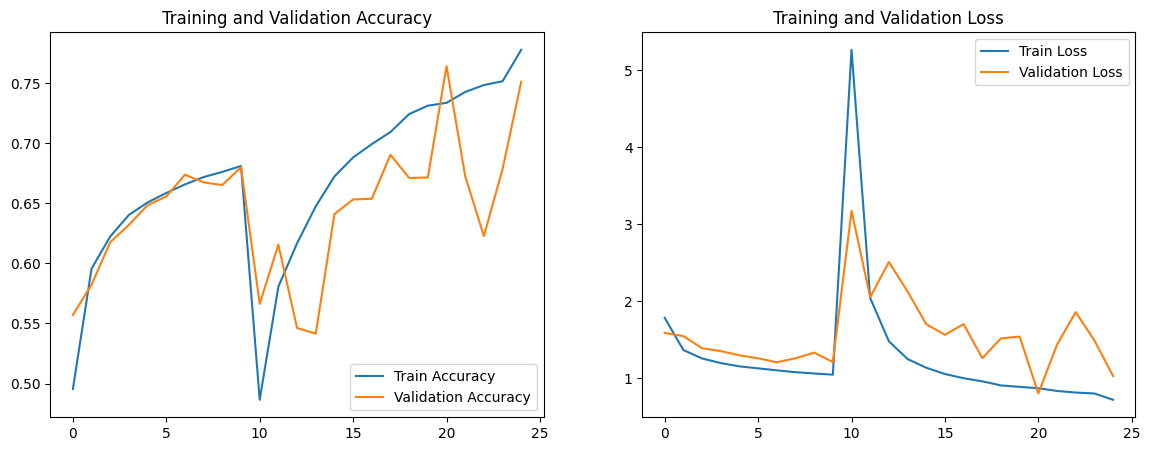

In [ ]:
plot_training_history(history_stage1, history_stage2)


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


NameError: name 'test_ds' is not defined

In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━

In [ ]:
accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(
    y_true,
    y_pred,
    average="weighted",
    zero_division=0
)

recall = recall_score(
    y_true,
    y_pred,
    average="weighted",
    zero_division=0
)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")


In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=train_ds.class_names
)

fig, ax = plt.subplots(figsize=(14, 14))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.show()


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
def display_gradcam(image, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + image
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.title("Grad-CAM Visualization")
    plt.show()


In [ ]:
# خدي صورة من validation
for images, labels in val_ds.take(1):
    img = images[0].numpy().astype("uint8")
    label = labels[0].numpy()
    break

# preprocess للصورة
img_resized = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img_resized / 255.0, axis=0)

# اسم آخر convolution layer في ResNet50
last_conv_layer_name = "conv5_block3_out"

heatmap = make_gradcam_heatmap(
    img_array,
    model,
    last_conv_layer_name
)

display_gradcam(img_resized, heatmap)
